In [ ]:
import time
import random
import heapq

# Метод быстрой сортировки
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Метод турнирной сортировки (heap sort)
def tournament_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

# Получаем размер массива от пользователя
n = int(input("Введите размер массива: "))

# Генерируем случайный массив нужного размера
array = [random.randint(1, 1000) for _ in range(n)]

# Копия массива для последующих тестов
original_array = array.copy()

# Количество испытаний
num_trials = 5

# 1. Тестирование быстрой сортировки
quick_times = []
for trial in range(num_trials):
    start_time = time.time()
    sorted_array = quick_sort(original_array.copy())
    elapsed_time = (time.time() - start_time) * 1000
    quick_times.append(elapsed_time)
    print(f"Быстрая сортировка (Попытка {trial + 1}):\n\tВремя выполнения: {elapsed_time:.6f} мс")
avg_quick_time = sum(quick_times) / num_trials
print(f"\nСреднее время выполнения быстрой сортировки ({num_trials} попыток): {avg_quick_time:.6f} мс\n")

# 2. Тестирование транспортной сортировки (Tournament Sort)
tournament_times = []
for trial in range(num_trials):
    start_time = time.time()
    sorted_array = tournament_sort(original_array.copy())
    elapsed_time = (time.time() - start_time) * 1000
    tournament_times.append(elapsed_time)
    print(f"Транспортная сортировка (Попытка {trial + 1}):\n\tВремя выполнения: {elapsed_time:.6f} мс")
avg_tournament_time = sum(tournament_times) / num_trials
print(f"\nСреднее время выполнения транспортной сортировки ({num_trials} попыток): {avg_tournament_time:.6f} мс\n")

# 3. Тестирование стандартной сортировки (Timsort)
std_times = []
for trial in range(num_trials):
    start_time = time.time()
    sorted_array = sorted(original_array.copy())
    elapsed_time = (time.time() - start_time) * 1000
    std_times.append(elapsed_time)
    print(f"Стандартная сортировка (Попытка {trial + 1}):\n\tВремя выполнения: {elapsed_time:.6f} мс")
avg_std_time = sum(std_times) / num_trials
print(f"\nСреднее время выполнения стандартной сортировки ({num_trials} попыток): {avg_std_time:.6f} мс\n")

Введите размер массива: 1000000
Быстрая сортировка (Попытка 1):
	Время выполнения: 2482.526064 мс
Быстрая сортировка (Попытка 2):
	Время выполнения: 2605.133533 мс
Быстрая сортировка (Попытка 3):
	Время выполнения: 2142.983198 мс
Быстрая сортировка (Попытка 4):
	Время выполнения: 2214.397669 мс
Быстрая сортировка (Попытка 5):
	Время выполнения: 2237.014771 мс

Среднее время выполнения быстрой сортировки (5 попыток): 2336.411047 мс

Транспортная сортировка (Попытка 1):
	Время выполнения: 1511.367321 мс
Транспортная сортировка (Попытка 2):
	Время выполнения: 2219.383001 мс
Транспортная сортировка (Попытка 3):
	Время выполнения: 1685.411453 мс
Транспортная сортировка (Попытка 4):
	Время выполнения: 1514.147520 мс
Транспортная сортировка (Попытка 5):
	Время выполнения: 1502.472878 мс

Среднее время выполнения транспортной сортировки (5 попыток): 1686.556435 мс

Стандартная сортировка (Попытка 1):
	Время выполнения: 258.805037 мс
Стандартная сортировка (Попытка 2):
	Время выполнения: 239.81

In [ ]:
import random
import bisect
import time

# Функция для генерации отсортированного списка случайных чисел
def generate_random_data(size):
    return sorted(random.sample(range(1, size * 10), size))

# Меню пользователя
def display_menu():
    print("\nМеню:")
    print("1. Найти элемент (бинарный и стандартный поиск)")
    print("2. Добавить элемент")
    print("3. Удалить элемент")
    print("4. Выход")

# Бинарный поиск элемента
def binary_search(data, value):
    start_time = time.time_ns()  # Наносекунды
    position = bisect.bisect_left(data, value)
    found = position < len(data) and data[position] == value
    end_time = time.time_ns()
    duration = (end_time - start_time) / 1000  # Микросекунды
    return found, duration

# Стандартный поиск (линейный поиск)
def standard_search(data, value):
    start_time = time.time_ns()  # Наносекунды
    found = value in data
    end_time = time.time_ns()
    duration = (end_time - start_time) / 1000  # Микросекунды
    return found, duration

# Добавление элемента
def add_element():
    global data
    value = int(input("Введите новое число для добавления: "))
    start_time = time.time_ns()
    bisect.insort(data, value)
    end_time = time.time_ns()
    duration = (end_time - start_time) / 1000  # Микросекунды
    print(f"Элемент {value} успешно добавлен, время добавления: {duration:.6f} мкс.")

# Удаление элемента
def delete_element():
    global data
    value = int(input("Введите удаляемое число: "))
    start_time = time.time_ns()
    position = bisect.bisect_left(data, value)
    if position < len(data) and data[position] == value:
        del data[position]
        end_time = time.time_ns()
        duration = (end_time - start_time) / 1000  # Микросекунды
        print(f"Элемент {value} успешно удален, время удаления: {duration:.6f} мкс.")
    else:
        end_time = time.time_ns()
        duration = (end_time - start_time) / 1000  # Микросекунды
        print(f"Элемент не найден, время удаления: {duration:.6f} мкс.")

# Общий поиск с одновременным проведением бинарного и стандартного поиска
def combined_search():
    global data
    value = int(input("Введите искомое число: "))

    # Бинарный поиск
    bin_found, bin_duration = binary_search(data, value)

    # Стандартный поиск
    std_found, std_duration = standard_search(data, value)

    # Вывод результатов
    print(f"--- Результаты поиска ---")
    print(f"Бинарный поиск: {'найден' if bin_found else 'не найден'}, время поиска: {bin_duration:.6f} мкс.")
    print(f"Стандартный поиск: {'найден' if std_found else 'не найден'}, время поиска: {std_duration:.6f} мкс.")

    # Сравнение скоростей
    if bin_duration < std_duration:
        print("Бинарный поиск оказался быстрее.")
    else:
        print("Стандартный поиск оказался быстрее.")

# Главный цикл программы
if __name__ == "__main__":
    # Запрашиваем у пользователя размер массива
    SIZE = int(input("Введите размер массива: "))
    data = generate_random_data(SIZE)

    while True:
        display_menu()
        choice = input("Выберите действие (1-4): ")

        if choice == '1':  # Комбинированный поиск
            combined_search()
        elif choice == '2':  # Добавление элемента
            add_element()
        elif choice == '3':  # Удаление элемента
            delete_element()
        elif choice == '4':  # Выход
            break
        else:
            print("Некорректный выбор. Попробуйте снова.")

    print("До свидания!")

Введите размер массива: 50000

Меню:
1. Найти элемент (бинарный и стандартный поиск)
2. Добавить элемент
3. Удалить элемент
4. Выход
Выберите действие (1-4): 2
Введите новое число для добавления: 11000
Элемент 11000 успешно добавлен, время добавления: 64.989000 мкс.

Меню:
1. Найти элемент (бинарный и стандартный поиск)
2. Добавить элемент
3. Удалить элемент
4. Выход
Выберите действие (1-4): 1
Введите искомое число: 11000
--- Результаты поиска ---
Бинарный поиск: найден, время поиска: 11.513000 мкс.
Стандартный поиск: найден, время поиска: 106.564000 мкс.
Бинарный поиск оказался быстрее.

Меню:
1. Найти элемент (бинарный и стандартный поиск)
2. Добавить элемент
3. Удалить элемент
4. Выход
Выберите действие (1-4): 3
Введите удаляемое число: 11000
Элемент 11000 успешно удален, время удаления: 53.781000 мкс.

Меню:
1. Найти элемент (бинарный и стандартный поиск)
2. Добавить элемент
3. Удалить элемент
4. Выход
Выберите действие (1-4): 4
До свидания!


In [12]:
import time
import random
import hashlib

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        # Используем SHA-256 для хэширования ключа
        hash_object = hashlib.sha256(key.encode())
        hex_dig = hash_object.hexdigest()
        # Преобразуем хэш в индекс
        return int(hex_dig, 16) % self.size

    def add(self, key, value):
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                pair[1] = value
                return
        self.table[index].append([key, value])

    def search(self, key):
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                return pair[1]
        return None

    def remove(self, key):
        index = self._hash(key)
        for i, pair in enumerate(self.table[index]):
            if pair[0] == key:
                del self.table[index][i]
                return

def main():
    # Генерация начального набора случайных данных
    n = int(input("Введите количество элементов в хэш-таблице: "))
    hash_table = HashTable(n)

    # Добавление начальных данных
    for _ in range(n):
        key = str(random.randint(1, 100))
        value = random.randint(1, 100)
        hash_table.add(key, value)

    while True:
        print("\nВыберите действие:")
        print("1. Добавить элемент")
        print("2. Найти элемент")
        print("3. Удалить элемент")
        print("4. Выйти")
        choice = int(input("Введите номер действия: "))

        if choice == 1:
            key = input("Введите ключ для добавления: ")
            value = int(input("Введите значение для добавления: "))
            start_time = time.time()
            hash_table.add(key, value)
            end_time = time.time()
            execution_time = (end_time - start_time) * 1_000_000
            print(f"Время выполнения добавления: {execution_time:.2f} микросекунд")
        elif choice == 2:
            key = input("Введите ключ для поиска: ")
            start_time = time.time()
            value = hash_table.search(key)
            end_time = time.time()
            execution_time = (end_time - start_time) * 1_000_000
            if value is not None:
                print(f"Значение для ключа '{key}': {value}")
            else:
                print(f"Ключ '{key}' не найден в хэш-таблице.")
            print(f"Время выполнения поиска: {execution_time:.2f} микросекунд")
        elif choice == 3:
            key = input("Введите ключ для удаления: ")
            start_time = time.time()
            hash_table.remove(key)
            end_time = time.time()
            execution_time = (end_time - start_time) * 1_000_000
            print(f"Время выполнения удаления: {execution_time:.2f} микросекунд")
        elif choice == 4:
            break
        else:
            print("Неверный выбор. Пожалуйста, выберите снова.")

if __name__ == "__main__":
    main()

Введите количество элементов в хэш-таблице: 10

Выберите действие:
1. Добавить элемент
2. Найти элемент
3. Удалить элемент
4. Выйти
Введите номер действия: 1
Введите ключ для добавления: 10
Введите значение для добавления: 9
Время выполнения добавления: 27.18 микросекунд

Выберите действие:
1. Добавить элемент
2. Найти элемент
3. Удалить элемент
4. Выйти
Введите номер действия: 2
Введите ключ для поиска: 9
Ключ '9' не найден в хэш-таблице.
Время выполнения поиска: 29.09 микросекунд

Выберите действие:
1. Добавить элемент
2. Найти элемент
3. Удалить элемент
4. Выйти
Введите номер действия: 2
Введите ключ для поиска: 10
Значение для ключа '10': 9
Время выполнения поиска: 28.61 микросекунд

Выберите действие:
1. Добавить элемент
2. Найти элемент
3. Удалить элемент
4. Выйти
Введите номер действия: 4


In [ ]:
import time

def create_bad_char_table(pattern):
    """Создает таблицу смещения символов"""
    table = {}
    for i in range(len(pattern)):
        # Последняя позиция каждого символа в шаблоне
        table[pattern[i]] = len(pattern) - i - 1
    return table

def boyer_moore_search(text, pattern, case_sensitive=True):
    """
    Поиск подстроки в тексте по алгоритму Бойера-Мура.
    :param text: Исходная строка
    :param pattern: Подстрока для поиска
    :param case_sensitive: Чувствительность к регистру
    """
    if not case_sensitive:
        text = text.lower()
        pattern = pattern.lower()

    bad_char_table = create_bad_char_table(pattern)
    m = len(pattern)
    n = len(text)
    s = 0  # Текущая позиция начала проверки

    while s <= n - m:
        j = m - 1

        # Сравниваем символы от конца подстроки
        while j >= 0 and text[s + j] == pattern[j]:
            j -= 1

        if j < 0:
            print(f'\nМетод Бойера-Мура: Подстрока найдена в позиции {s}\n')
            break
        else:
            # Смещаемся на длину шаблона или расстояние до следующего возможного совпадения
            shift = bad_char_table.get(text[s + m - 1], m)
            s += max(shift, 1)
    else:
        print('\nМетод Бойера-Мура: Подстрока не найдена\n')

# Стандартная реализация поиска (метод str.find())
def standard_search(text, pattern, case_sensitive=True):
    """
    Строковый поиск с помощью встроенной функции find().
    :param text: Исходная строка
    :param pattern: Подстрока для поиска
    :param case_sensitive: Чувствительность к регистру
    """
    if not case_sensitive:
        text = text.lower()
        pattern = pattern.lower()

    pos = text.find(pattern)
    if pos != -1:
        print(f'\nСтандартный поиск: Подстрока найдена в позиции {pos}\n')
    else:
        print('\nСтандартный поиск: Подстрока не найдена\n')

# Функционал для многострочного ввода
def multiline_input(prompt="Вводите текст (Ctrl+D или пустая строка завершают ввод):\n"):
    lines = []
    print(prompt)
    try:
        while True:
            line = input()
            if line.strip() == "":
                break
            lines.append(line)
    except EOFError:
        pass
    return "\n".join(lines)

if __name__ == "__main__":
    # Многострочная строка вводится пользователем
    text = multiline_input()
    sub_string = input("Введите искомую подстроку: ")
    case_sensitive_input = input("Регистр чувствителен? (Да/Нет): ").strip().lower() == 'да'

    # Запуск поиска по методу Бойера-Мура
    print("\nЗапуск метода Бойера-Мура...")
    start_time = time.time()
    boyer_moore_search(text, sub_string, case_sensitive=case_sensitive_input)
    end_time = time.time()
    print(f"Время работы метода Бойера-Мура: {(end_time - start_time) * 1000:.4f} мс\n")

    # Запуск стандартного поиска
    print("Запуск стандартного поиска...")
    start_time = time.time()
    standard_search(text, sub_string, case_sensitive=case_sensitive_input)
    end_time = time.time()
    print(f"Время работы стандартного поиска: {(end_time - start_time) * 1000:.4f} мс\n")

Вводите текст (Ctrl+D или пустая строка завершают ввод):

Внешний вид   Машина времени из сериала «Доктор Кто» в виде полицейской будки ТАРДИС  Машина времени из фильма «Назад в будущее» в виде модифицированного автомобиля DeLorean Машина времени может быть компактным устройством, как в рассказе Станислава Лема «Пропавшая машина времени», а также может совмещать перенос в пространстве и во времени, как в фильме «Кин-дза-дза». В романах о Гарри Поттере фигурирует маховик времени в виде кулона, который способен переносить своего обладателя в прошлое, в зависимости от числа оборотов механизма.  Один из первых «изобретателей» машины времени Герберт Уэллс не вдавался в подробности конструкции устройства. Принцип действия его машины основан на движении вдоль оси времени, как вдоль одного из любых других трёх измерений, и «единственное различие между Временем и любым из трёх пространственных измерений заключается в том, что наше сознание движется по нему». При этом путешествующий переносится 

In [47]:
from google.colab import files
from collections import deque
import re

# Класс для представления стека
class Stack:
    def __init__(self):
        self.items = deque()

    def push(self, value):
        self.items.append(value)

    def pop(self):
        return self.items.pop()

    def top(self):
        return self.items[-1]

    def is_empty(self):
        return len(self.items) == 0

# Проверяет, является ли токен именем переменной
def is_valid_name(token):
    return bool(re.match(r'^[a-zA-Z][a-zA-Z0-9]*$', token))  # Допускаем любые идентификаторы

# Функция для глубокой проверки формулы
def deep_validate_formula(tokens):
    stack = Stack()
    current_token = None
    previous_was_operator = False

    if not tokens or (tokens[0] not in {'(', 'x', 'y', 'z'}):
        return False
    if tokens[-1] not in {')', 'x', 'y', 'z'}:
        return False

    for idx, token in enumerate(tokens):
        if token == '(':
            stack.push(token)
            current_token = 'open_paren'
        elif token == ')':
            if stack.is_empty() or stack.top() != '(':
                return False
            stack.pop()
            current_token = 'close_paren'
        elif token in {'+', '-'}:
            if previous_was_operator or (current_token == 'operator'):
                return False
            current_token = 'operator'
            previous_was_operator = True
        elif is_valid_name(token):
            if previous_was_operator or (current_token == 'term'):
                return False
            current_token = 'term'
            previous_was_operator = False
        else:
            return False

    return stack.is_empty() and current_token != 'operator'

# Основной цикл программы
uploaded = files.upload()  # Для работы в Google Colab
filename = next(iter(uploaded))

try:
    with open(filename, 'r') as f:
        content = f.read().strip()
        # Выделяем только важные токены
        tokens = list(filter(None, re.findall(r'[a-zA-Z0-9()+-]', content)))  # Теперь разрешаем также буквы и числа

    if deep_validate_formula(tokens):
        print("Формула корректна.")
    else:
        print("Формула некорректна.")

except Exception as e:
    print(f"Произошла ошибка при обработке файла: {e}")

Saving тест.txt to тест (19).txt
Формула некорректна.


In [ ]:
import time

def create_bad_char_table(pattern):
    """Создает таблицу смещения символов"""
    table = {}
    for i in range(len(pattern)):
        # последняя позиция каждого символа в шаблоне
        table[pattern[i]] = len(pattern) - i - 1
    return table

def boyer_moore_search(text, pattern, case_sensitive=True):
    """
    Поиск подстроки в тексте по алгоритму Бойера-Мура.
    :param text: Исходная строка
    :param pattern: Подстрока для поиска
    :param case_sensitive: Чувствительность к регистру
    """
    if not case_sensitive:
        text = text.lower()
        pattern = pattern.lower()

    bad_char_table = create_bad_char_table(pattern)
    m = len(pattern)
    n = len(text)
    s = 0  # Текущая позиция начала проверки

    while s <= n - m:
        j = m - 1

        # сравниваем символы от конца подстроки
        while j >= 0 and text[s + j] == pattern[j]:
            j -= 1

        if j < 0:
            print(f"\nМетод Бойера-Мура: Подстрока найдена в позиции {s}")
            break
        else:
            # смещаемся на длину шаблона или расстояние до следующего возможного совпадения
            shift = bad_char_table.get(text[s + m - 1], m)
            s += max(shift, 1)
    else:
        print("\nМетод Бойера-Мура: Подстрока не найдена")

# Стандартная реализация поиска (метод str.find())
def standard_search(text, pattern, case_sensitive=True):
    """
    Строковый поиск с помощью встроенной функции find().
    :param text: Исходная строка
    :param pattern: Подстрока для поиска
    :param case_sensitive: Чувствительность к регистру
    """
    if not case_sensitive:
        text = text.lower()
        pattern = pattern.lower()

    pos = text.find(pattern)
    if pos != -1:
        print(f"\nСтандартный поиск: Подстрока найдена в позиции {pos}")
    else:
        print("\nСтандартный поиск: Подстрока не найдена")

# Многостроковый ввод
def multiline_input(prompt="Вводите текст (Ctrl+D или пустая строка завершают ввод):\n"):
    lines = []
    print(prompt)
    try:
        while True:
            line = input()
            if line.strip() == "":
                break
            lines.append(line)
    except EOFError:
        pass
    return "\n".join(lines)

if __name__ == "__main__":
    # Многостроковая строка вводится пользователем
    text = multiline_input()
    sub_string = input("Введите искомую подстроку: ")
    case_sensitive_input = input("Регистр чувствителен? (Да/Нет): ").strip().lower() == 'да'

    # Запуск поиска по методу Бойера-Мура
    print("\nЗапуск метода Бойера-Мура...")
    start_time = time.time()
    boyer_moore_search(text, sub_string, case_sensitive=case_sensitive_input)
    end_time = time.time()
    print(f"Время работы метода Бойера-Мура: {(end_time - start_time) * 1_000_000:.4f} мкс\n")

    # Запуск стандартного поиска
    print("Запуск стандартного поиска...")
    start_time = time.time()
    standard_search(text, sub_string, case_sensitive=case_sensitive_input)
    end_time = time.time()
    print(f"Время работы стандартного поиска: {(end_time - start_time) * 1_000_000:.4f} мкс\n")


Вводите текст (Ctrl+D или пустая строка завершают ввод):

Hellojfklqjfkl mnfmqnfqkfjq qweklqwj HowAreYoufhqfm ejqlkeNameKKfq
Name

Введите искомую подстроку: Name
Регистр чувствителен? (Да/Нет): Да

Запуск метода Бойера-Мура...

Метод Бойера-Мура: Подстрока найдена в позиции 58
Время работы метода Бойера-Мура: 41.0080 мкс

Запуск стандартного поиска...

Стандартный поиск: Подстрока найдена в позиции 58
Время работы стандартного поиска: 9.2983 мкс



Укажите глубину рекурсии: 6
Было использовано 299593 рекурсивных вызовов.
Выполнение заняло 206.823 секунд.


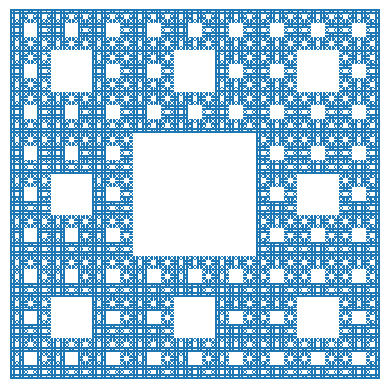

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import time  # Импортируем модуль для измерения времени

count_calls = 0  # Глобальная переменная для учета количества вызовов функции

def draw_serpinsky(x, y, size, depth):
    global count_calls
    count_calls += 1  # Подсчет каждого вызова функции

    # Базовый случай: если глубина равна нулю, рисуем прямоугольник
    if depth == 0:
        ax.add_patch(Rectangle((x, y), size, size, fill=True))
        return

    # Рассчитываем размер меньших квадратов
    new_size = size / 3

    # Рекурсивное деление квадрата на 8 частей, пропуская центральную
    for i in range(3):
        for j in range(3):
            if not(i == 1 and j == 1):  # Пропускаем центр
                nx = x + i * new_size
                ny = y + j * new_size
                draw_serpinsky(nx, ny, new_size, depth - 1)

# Настройка графика
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.axis('off')  # Убираем оси координат

# Запрашиваем глубину рекурсии у пользователя
depth = int(input("Укажите глубину рекурсии: "))
size = 1  # Размер начального квадрата

start_time = time.time()  # Начало отсчета времени

draw_serpinsky(0, 0, size, depth)

end_time = time.time()  # Окончание отсчета времени
execution_time = end_time - start_time  # Вычисление затраченного времени

print(f"Было использовано {count_calls} рекурсивных вызовов.")
print(f"Выполнение заняло {execution_time:.3f} секунд.")

plt.show()